# ***Ejercicios Numpy y DataFrame***

Importamos las librerías

In [23]:
import numpy as np
import pandas as pd
from random import *
import matplotlib.pyplot as plt
import seaborn as sns

### Ejericio 1

1. Suma y estadísticas

Crea un array NumPy de 100 números aleatorios entre 0 y 100. Muestra:
* El mínimo, máximo, promedio y desviación estándar.
* Cuántos valores están por encima del promedio.

***Notas***
* randint : nos permite generar un número entero aleatorio dentro de un rango especificado.
* rand : nos proporciona un valor flotante aleatorio entre 0 y 1.
* Recoderdemos que el ultimo valor no lo toma, por lo que debemos poner 101.
* size es para las dimensiones a generar, en este caso como es unidmensional sería de 100x1. == (1,100).
* Si ponemos el 1, no creara 100 filas de un valor. (100,1).
* La ***desviación estándar*** es una medida estadística que cuantifica la dispersión o variabilidad de un conjunto de datos. Mide qué tan alejados están los valores individuales del promedio (media) del conjunto de datos.
* Para una población
$$
\sigma = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2 }
$$
* Desviación para una Muestra
$$
s = \sqrt{ \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2 }
$$

In [20]:
# datos = np.random.randint(0, 101, 100) # ChatGPT
x = np.random.randint(1, 101, size=(1,100))

# Calculamos el promedio de la muestra
print("\nValores:", x)

# guardamos el dato
prom = x.mean()
print("\nPromedio:",prom)
print("\nValor Minimo:", x.min())
print("\nValor Maximo:", x.max())
print("\nDesviación estándar %0.2f" % np.std(x))

# valores que pasan sobre el promedio
print("\nSobresalientes:",x[x>prom], " Cantidad:", np.sum(x > prom))


Valores: [[  9  52  73  78  30  97  31  86  37  45  70  17  95  43  74  67  66  75
   63  92  78  93   4  91  82  96  18  71  15  84  82   8  43  11  34  31
   69  56  86 100  97  46   1  88   9   7  96  42  36 100  47  75  82  65
   83  51  93  54  18  74  30  13  39  66  18  48  83  41  51   9  43  40
   37  62  43  46  38  41  69  56  58  16   3  38  80  25  10  64  48  47
   65  47  71  15  28   8  48   5  76  60]]

Promedio: 52.01

Valor Minimo: 1

Valor Maximo: 100

Desviación estándar 28.08

Sobresalientes: [ 73  78  97  86  70  95  74  67  66  75  63  92  78  93  91  82  96  71
  84  82  69  56  86 100  97  88  96 100  75  82  65  83  93  54  74  66
  83  62  69  56  58  80  64  65  71  76  60]  Cantidad: 47


### Ejercicio 2

2. Conversión a DataFrame
Convierte una lista de diccionarios con nombres, edades y ciudades en un DataFrame de pandas. Luego:
* Filtra los mayores de 30
* Ordena por edad
* Cuenta cuántos hay por ciudad

***Notas***
* Los filtros son iguales que en los arreglos de numpy.
* En lugar de usar un ***sort(reverse=True)***, tenemos que usar el by t el ascending.
* Este es muy bueno para contar las frecuencias de cada valor ***.value_counts()***.

In [45]:
# Lista de diccionarios con todo la información
personas = [
    {"nombre": "Ana", "edad": 28, "ciudad": "Madrid"},
    {"nombre": "Luis", "edad": 35, "ciudad": "Barcelona"},
    {"nombre": "María", "edad": 42, "ciudad": "Valencia"},
    {"nombre": "Carlos", "edad": 22, "ciudad": "Madrid"},
    {"nombre": "Elena", "edad": 31, "ciudad": "Sevilla"},
    {"nombre": "Pablo", "edad": 29, "ciudad": "Barcelona"},
    {"nombre": "Lucía", "edad": 45, "ciudad": "Valencia"},
    {"nombre": "Andrés", "edad": 33, "ciudad": "Madrid"},
]

# transformamos a diccionario
info = pd.DataFrame(personas)

# personas mayores a 30
filtro = info["edad"]> 30
print("\nPaises con su habitante mayor a 30:\n", info[filtro])

# ordenados por edad (descendentes)
print("\nPaises ordenados por edad:\n", info.sort_values(by="edad",  ascending=False))

# Frecuencias
"""
ciudades = list(info["ciudad"])
frec = {}
for ciudad in ciudades:
    if ciudad in frec.keys():
        frec[ciudad] = frec[ciudad] + 1
    else:
        frec[ciudad] = 1
print("\nFrecuencias:\n", frec)
"""
print("\nFrecuencias:\n", info["ciudad"].value_counts())


Paises con su habitante mayor a 30:
    nombre  edad     ciudad
1    Luis    35  Barcelona
2   María    42   Valencia
4   Elena    31    Sevilla
6   Lucía    45   Valencia
7  Andrés    33     Madrid

Paises ordenados por edad:
    nombre  edad     ciudad
6   Lucía    45   Valencia
2   María    42   Valencia
1    Luis    35  Barcelona
7  Andrés    33     Madrid
4   Elena    31    Sevilla
5   Pablo    29  Barcelona
0     Ana    28     Madrid
3  Carlos    22     Madrid

Frecuencias:
 ciudad
Madrid       3
Barcelona    2
Valencia     2
Sevilla      1
Name: count, dtype: int64


In [43]:
ciudades = list(info["ciudad"])
frec = {}
for ciudad in ciudades:
    if ciudad in frec.keys():
        frec[ciudad] = frec[ciudad] + 1
    else:
        frec[ciudad] = 1
frec

{'Madrid': 3, 'Barcelona': 2, 'Valencia': 2, 'Sevilla': 1}

### Ejemplo 3

3. Temperaturas
Crea un DataFrame con temperaturas diarias (en °C) de una semana. Calcula:
* Media por día
* Qué días estuvieron por encima de 30°C
* Agrega una columna que convierta las temperaturas a °F

***Notas***
* ***df[["Madrid", "Barcelona", "Sevilla"]].mean(axis=1)*** : Tomamos las 3 columnas, y de promediamos de manera horizontal.
    * 0: Por columna (default) → promedio por ciudad.
    * 1: Por fila → promedio por día

In [63]:
# Crear un DataFrame con temperaturas por día
datos = {
    "día": ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"],
    "Madrid": [22, 25, 27, 30, 35, 33, 28],
    "Barcelona": [21, 23, 26, 29, 31, 30, 27],
    "Sevilla": [25, 28, 32, 36, 38, 37, 34]
}

df = pd.DataFrame(datos)

# Agregamos una columna con los promedios
# Media por día 
df["Promedio_dia"] = df[["Madrid", "Barcelona", "Sevilla"]].mean(axis=1)
print("\nTemperaturas:\n", df)
print("\n Dias mayores a 30:\n", df[df["Promedio_dia"]> 30])

# Temperatura a Farenheit
df["Faren"] = (df["Promedio_dia"] * 9/5) + 32
print("\n Faren:\n", df)


Temperaturas:
          día  Madrid  Barcelona  Sevilla  Promedio_dia
0      Lunes      22         21       25     22.666667
1     Martes      25         23       28     25.333333
2  Miércoles      27         26       32     28.333333
3     Jueves      30         29       36     31.666667
4    Viernes      35         31       38     34.666667
5     Sábado      33         30       37     33.333333
6    Domingo      28         27       34     29.666667

 Dias mayores a 30:
        día  Madrid  Barcelona  Sevilla  Promedio_dia
3   Jueves      30         29       36     31.666667
4  Viernes      35         31       38     34.666667
5   Sábado      33         30       37     33.333333

 Faren:
          día  Madrid  Barcelona  Sevilla  Promedio_dia  Faren
0      Lunes      22         21       25     22.666667   72.8
1     Martes      25         23       28     25.333333   77.6
2  Miércoles      27         26       32     28.333333   83.0
3     Jueves      30         29       36     31.6666

In [65]:
# 1. Crear el DataFrame
df = pd.DataFrame(datos)

# 2. Calcular la media por día (promedio entre ciudades)
df["Media°C"] = df[["Madrid", "Barcelona", "Sevilla"]].mean(axis=1)

# 3. Días con temperaturas mayores a 30°C en al menos una ciudad
dias_calientes = df[
    (df["Madrid"] > 30) | 
    (df["Barcelona"] > 30) | 
    (df["Sevilla"] > 30)
]

# 4. Agregar columnas en Fahrenheit
df["Madrid_F"] = df["Madrid"] * 9/5 + 32
df["Barcelona_F"] = df["Barcelona"] * 9/5 + 32
df["Sevilla_F"] = df["Sevilla"] * 9/5 + 32

# Mostrar resultados
print("=== DataFrame ===")
print(df)

print("\n=== Días con temperaturas > 30°C en alguna ciudad ===")
print(dias_calientes[["día", "Madrid", "Barcelona", "Sevilla"]])


=== DataFrame ===
         día  Madrid  Barcelona  Sevilla    Media°C  Madrid_F  Barcelona_F  \
0      Lunes      22         21       25  22.666667      71.6         69.8   
1     Martes      25         23       28  25.333333      77.0         73.4   
2  Miércoles      27         26       32  28.333333      80.6         78.8   
3     Jueves      30         29       36  31.666667      86.0         84.2   
4    Viernes      35         31       38  34.666667      95.0         87.8   
5     Sábado      33         30       37  33.333333      91.4         86.0   
6    Domingo      28         27       34  29.666667      82.4         80.6   

   Sevilla_F  
0       77.0  
1       82.4  
2       89.6  
3       96.8  
4      100.4  
5       98.6  
6       93.2  

=== Días con temperaturas > 30°C en alguna ciudad ===
         día  Madrid  Barcelona  Sevilla
2  Miércoles      27         26       32
3     Jueves      30         29       36
4    Viernes      35         31       38
5     Sábado      

### Ejercio 4

Genera un DataFrame con valores faltantes (NaN). Practica:

* Reemplazarlos con la media o mediana
* Eliminar las filas/columnas con demasiados NaN
* Rellenar con un valor constante

***Nota***
* ***np.nan*** literalmente sirve para no poner valores una una columna.

In [11]:
# Crearamos nuestro diccionario.
datos = {
    "estudiante": ["Ana", "Luis", "María", "Carlos", "Elena", "Pablo", "Lucía"],
    "matemáticas": [8, 6, np.nan, 7, 9, np.nan, 5],
    "historia": [7, np.nan, 6, 5, np.nan, 8, 7],
    "ciencias": [np.nan, 8, 7, 6, 5, 9, np.nan]
}

# Inicializamos nuestro data frame
df = pd.DataFrame(datos)

* ***`.fillna(df.mean(numeric_only=True))`*** : Este método rellena los NaN con la media de cada columna.
* ***`df.mean(numeric_only=True)`*** : Calcula la media de todas las columnas numéricas. 
* El argumento `numeric_only=True` en funciones como `.mean()` o `.median()` controla qué columnas se incluyen en el cálculo.
* Si tu DataFrame tiene columnas no numéricas, pandas puede lanzar un FutureWarning (o incluso un error en versiones futuras)., por eso debemos usar `numeric_only=True`

In [14]:
# Podemos usar el promedio
df_media = df.copy()
df_media[["matemáticas", "historia", "ciencias"]] = df_media[["matemáticas", "historia", "ciencias"]].fillna(df.mean(numeric_only=True))
df_media

,estudiante,matemáticas,historia,ciencias
0,Ana,8.0,7.0,7.0
1,Luis,6.0,6.6,8.0
2,María,7.0,6.0,7.0
3,Carlos,7.0,5.0,6.0
4,Elena,9.0,6.6,5.0
5,Pablo,7.0,8.0,9.0
6,Lucía,5.0,7.0,7.0


In [13]:
# Igualmente la mediana
df_mediana = df.copy()
df_mediana[["matemáticas", "historia", "ciencias"]] = df_mediana[["matemáticas", "historia", "ciencias"]].fillna(df.median(numeric_only=True))
df_mediana

,estudiante,matemáticas,historia,ciencias
0,Ana,8.0,7.0,7.0
1,Luis,6.0,7.0,8.0
2,María,7.0,6.0,7.0
3,Carlos,7.0,5.0,6.0
4,Elena,9.0,7.0,5.0
5,Pablo,7.0,8.0,9.0
6,Lucía,5.0,7.0,7.0


* En este caso solo rellanamos los NaN con un valor, realmente podemos asignarle cualquier valor.

In [18]:
df_constante = df.fillna("Sin dato")
df_constante

,estudiante,matemáticas,historia,ciencias
0,Ana,8.0,7.0,Sin dato
1,Luis,6.0,Sin dato,8.0
2,María,Sin dato,6.0,7.0
3,Carlos,7.0,5.0,6.0
4,Elena,9.0,Sin dato,5.0
5,Pablo,Sin dato,8.0,9.0
6,Lucía,5.0,7.0,Sin dato


### Ejercicio 5

Simula un DataFrame de ventas con las siguientes columnas:

fecha, producto, precio_unitario, cantidad
Haz:
* Una nueva columna total (precio x cantidad)
* Total vendido por producto (groupby)
* Día con mayores ventas
* Producto más vendido en cantidad

***NOTAS**
* DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, observed=False, dropna=True)
* Parameters :
  * `by`: Required parameter to specify the column(s) to group by.
  * `axis`: Optional, specifies the axis to group by (default is 0 for rows).
  * `level`: Optional, used for grouping by a certain level in a MultiIndex.
  * `as_index`: Optional, whether to use the group labels as the index (default is True).
  * `sort`: Optional, whether to sort the group keys (default is True).
  * `group_keys`: Optional, whether to add the group keys to the index (default is True).
  * `dropna`: Optional, whether to include rows/columns with NULL values (default is True

In [44]:
# Definimos el diccionario con la información.
datos = {
    "fecha": [
        "2024-05-01", "2024-05-01", "2024-05-02", "2024-05-02", "2024-05-03",
        "2024-05-03", "2024-05-04", "2024-05-04", "2024-05-05", "2024-05-05"
    ],
    "producto": [
        "Laptop", "Mouse", "Teclado", "Laptop", "Mouse",
        "Teclado", "Laptop", "Mouse", "Teclado", "Laptop"
    ],
    "precio_unitario": [
        1200, 25, 45, 1200, 30,
        50, 1150, 28, 48, 1100
    ],
    "cantidad": [
        1, 3, 2, 2, 5,
        1, 1, 4, 3, 2
    ]
}

df = pd.DataFrame(datos)
# Confirmamos que realmente sea una fecha
df["fecha"] = pd.to_datetime(df["fecha"])

# Calculamos lo vendido
df["entrada"] =  df["precio_unitario"] * df["cantidad"]
print("\nRegistro:\n", df)

# Sacamos cuanto vendío cada articulo
venta = df.groupby("producto")["entrada"].sum()
prod_max = venta.idxmax()
print("\nProdcuto con mayor venta:", prod_max)
print(venta)

# Día con mayores ventas
dia = df.groupby("fecha")["entrada"].sum()
dia_max_ventas = dia.idxmax()
print("\nMax Ventas Por día:\n", dia_max_ventas)
print(dia)



Registro:
        fecha producto  precio_unitario  cantidad  entrada
0 2024-05-01   Laptop             1200         1     1200
1 2024-05-01    Mouse               25         3       75
2 2024-05-02  Teclado               45         2       90
3 2024-05-02   Laptop             1200         2     2400
4 2024-05-03    Mouse               30         5      150
5 2024-05-03  Teclado               50         1       50
6 2024-05-04   Laptop             1150         1     1150
7 2024-05-04    Mouse               28         4      112
8 2024-05-05  Teclado               48         3      144
9 2024-05-05   Laptop             1100         2     2200

Prodcuto con mayor venta: Laptop
producto
Laptop     6950
Mouse       337
Teclado     284
Name: entrada, dtype: int64

Max Ventas Por día:
 2024-05-02 00:00:00
fecha
2024-05-01    1275
2024-05-02    2490
2024-05-03     200
2024-05-04    1262
2024-05-05    2344
Name: entrada, dtype: int64


### Ejercicio 6

Crea un DataFrame con estudiantes y sus notas en 3 materias. Calcula:

* Promedio por alumno.
* Cuántos aprobaron cada materia (nota >= 6).
* Ranking de estudiantes por promedio.

In [8]:
# Crear el DataFrame
datos = {
    "estudiante": ["Ana", "Luis", "María", "Carlos", "Elena", "Pablo", "Lucía", "Andrés"],
    "matemáticas": [8.5, 6.0, 9.0, 7.0, 5.5, 6.5, 8.0, 4.5],
    "historia": [7.0, 8.0, 9.5, 5.5, 6.0, 7.5, 8.0, 5.0],
    "ciencias": [9.0, 7.5, 8.5, 6.0, 5.0, 6.5, 9.0, 4.0]
}

df = pd.DataFrame(datos)
# Promedio por alumno
df["promedio"] = df[["matemáticas","historia","ciencias"]].mean(axis=1)
print("\nAlumnos:\n", df)


# Imprimir todos los acreditados por materia
acreditados = df[
    (df["matemáticas"] > 6) | 
    (df["historia"] > 6) | 
    (df["ciencias"] > 6)
]

print("\nAcreditados:\n")
print(acreditados[["estudiante", "matemáticas", "historia", "ciencias"]])

# Imprimimos el ordenamiento por promedio
print("\nPrimeros Lugares:\n")
print(df.sort_values(by="promedio", ascending=False))


Alumnos:
   estudiante  matemáticas  historia  ciencias  promedio
0        Ana          8.5       7.0       9.0  8.166667
1       Luis          6.0       8.0       7.5  7.166667
2      María          9.0       9.5       8.5  9.000000
3     Carlos          7.0       5.5       6.0  6.166667
4      Elena          5.5       6.0       5.0  5.500000
5      Pablo          6.5       7.5       6.5  6.833333
6      Lucía          8.0       8.0       9.0  8.333333
7     Andrés          4.5       5.0       4.0  4.500000

Acreditados:

  estudiante  matemáticas  historia  ciencias
0        Ana          8.5       7.0       9.0
1       Luis          6.0       8.0       7.5
2      María          9.0       9.5       8.5
3     Carlos          7.0       5.5       6.0
5      Pablo          6.5       7.5       6.5
6      Lucía          8.0       8.0       9.0

Primeros Lugares:

  estudiante  matemáticas  historia  ciencias  promedio
2      María          9.0       9.5       8.5  9.000000
6      Lucía    

### Ejercicio 7

Tienes dos DataFrames:

1. Uno con id_estudiante, nombre, edad
2. Otro con id_estudiante, curso, nota

Haz una unión (merge) y responde:
* ¿Qué estudiante tiene mejor nota por curso?
* ¿Cuál es el promedio de edad por curso?

***Notas***
* En este caso no podemos usar `pandas.concat()`. Para unir los dataframes podemos usar el método `.merge()` que es exactamente igual que la función `pandas.merge()`, y nos permitirá seleccionar la columna por la que queremos unir, y la forma de unión.
```python
df_1 = pd.DataFrame({"id": [1,2,3,4,5],
                    "fruta": ["manzana", "pera", "platano", "naranja", "aguacate"],
                    "precio": [0.20, 0.45, 0.15, 0.12, 0.62]})

df_2 = pd.DataFrame({"id":[5,4,3,2,1],
                     "stock": [10, 20, 25, 12, 40]})
df_3 = pd.DataFrame({"id":[4,2,5,1,3],
                     "ventas_totales":[3, 5, 2, 3, 6],
                     "ingresos_ventas": [120, 110, 64,44, 147]})
df_1.merge(df_2, on="id", how="left")
#unimos el primero al segundo y el resultado de dicha unión, le unimos el tercero
df_1.merge(df_2, on="id", how="left").merge(df_3, on="id", how="left")
```

In [21]:
# Definimos nuestros DataFrame
df_estudiantes = pd.DataFrame({
    'id_estudiante': [1, 2, 3, 4, 5],
    'nombre': ['Ana', 'Luis', 'María', 'Pedro', 'Sofía'],
    'edad': [20, 22, 21, 23, 20]
})

df_notas = pd.DataFrame({
    'id_estudiante': [1, 2, 3, 1, 4, 5, 2],
    'curso': ['Matemáticas', 'Matemáticas', 'Historia', 'Historia', 'Historia', 'Matemáticas', 'Historia'],
    'nota': [9.5, 8.7, 9.8, 7.5, 8.2, 9.0, 9.5]
})

# Hacemos el merge necesario
df_final = df_notas.merge(df_estudiantes, on="id_estudiante", how="left")

# Mejor nota de la clase
print("\nMejor Nota:\n")
print(df_final.sort_values(by="nota", ascending = False).head(1))

# Edad promedio por curso
edades = df_final.groupby("curso")["edad"].mean()
print("\nEdades:\n")
print(edades)


Mejor Nota:

   id_estudiante     curso  nota nombre  edad
2              3  Historia   9.8  María    21

Edades:

curso
Historia       21.500000
Matemáticas    20.666667
Name: edad, dtype: float64


* `.loc` es un accesor de etiquetas en pandas, y sirve para seleccionar filas o columnas de un DataFrame por etiquetas (no por posición).
* Te permite seleccionar datos usando los nombres (etiquetas) de filas y columnas.
* Es muy útil cuando quieres extraer subconjuntos del DataFrame o modificar datos.
* `df.loc[3]`  # Devuelve la fila con índice 3
* `df.loc[3, 'nombre']`  # Devuelve el valor en fila 3, columna 'nombre'
* `df.loc[df['edad'] > 21]`  # Filas donde la edad es mayor a 21

In [23]:
"""
VERSION GPT
"""
df_merged = pd.merge(df_notas, df_estudiantes, on='id_estudiante')

# Localizamos la fila con la mayor nota de cada curso y traemos las 3 columnas
mejores = df_merged.loc[df_merged.groupby('curso')['nota'].idxmax()][['curso', 'nombre', 'nota']]

print("\nMejor Nota:\n")
print(mejores)

print("\nEdades:\n")
# Esto si lo hice igual
prom_edad = df_merged.groupby('curso')['edad'].mean().reset_index()
print(prom_edad)


Mejor Nota:

         curso nombre  nota
2     Historia  María   9.8
0  Matemáticas    Ana   9.5

Edades:

         curso       edad
0     Historia  21.500000
1  Matemáticas  20.666667


### Ejercicio 8

Carga un CSV ficticio con datos diarios de clima:

1. fecha, temperatura, humedad, lluvia (sí/no)

Analiza:
* Promedio de temperatura por mes.
* ¿Qué porcentaje de días llovió?.
* Días extremos: más calor, más humedad, menos temperatura.

In [38]:
path = "C:\\Users\\PC\\OneDrive\\Documentos\\CursoAnaliticaDatos\\MACHINE-LEARNING\\NIVEL2\\datos\\clima.csv"

# Parceamos la fecha
clima = pd.read_csv(path, parse_dates=['fecha'])

# Creamos una columna nueva para no alterar los datos de fecha
clima['mes'] = clima['fecha'].dt.month

# Promedio de temperatura por mes
prom_temp = clima.groupby('mes')['temperatura'].mean().reset_index()
print("\nPromedio de temperatura por mes:\n")
print(prom_temp)

# Porcentaje de los días que llovío
total_dias = len(clima)
dias_lluvia = len(clima[clima['lluvia'] == 'sí'])
porcentaje_lluvia = dias_lluvia / total_dias * 100
print(f"\nPorcentaje de días con lluvia: {porcentaje_lluvia:.2f}%")

# Días extremos: más calor, más humedad, menos temperatura. (No es necesario ordenar)
# Nos imprimería toda la fila.
max_temp = clima.loc[clima['temperatura'].idxmax()]
min_temp = clima.loc[clima['temperatura'].idxmin()]
max_hum = clima.loc[clima['humedad'].idxmax()]

print("\nMayor temperatura:\n", max_temp)
print("\nMenor temperatura:\n", min_temp)
print("\nMayor Humedad:\n", max_hum)


Promedio de temperatura por mes:

   mes  temperatura
0    1         22.0
1    2         26.6
2    3         30.2

Porcentaje de días con lluvia: 46.67%

Mayor temperatura:
 fecha          2025-03-04 00:00:00
temperatura                   32.0
humedad                         63
lluvia                          sí
mes                              3
Name: 13, dtype: object

Menor temperatura:
 fecha          2025-01-05 00:00:00
temperatura                   19.0
humedad                         75
lluvia                          sí
mes                              1
Name: 4, dtype: object

Mayor Humedad:
 fecha          2025-02-03 00:00:00
temperatura                   28.0
humedad                         80
lluvia                          sí
mes                              2
Name: 7, dtype: object


### Ejercicio 9

Simula o descarga un archivo CSV con datos de empleados:

1. nombre, departamento, salario, años_experiencia, edad

Haz:
* Estadísticas descriptivas por departamento
* ¿Existe correlación entre edad y salario?
* ¿Quién gana más por año de experiencia?
* Gráfica de distribución de sueldos por departamento (con matplotlib o seaborn si puedes)

***Notas***
* La correlación entre datos mide la relación o asociación entre dos variables. Es decir, cuánto cambia una variable cuando cambia otra.
* Si dos variables están correlacionadas, significa que hay un patrón en cómo varían juntas.
* La correlación no implica causalidad, solo que hay una relación numérica observable.
* `.corr()`usamos esto para sacar la correlación entre datos.
    * Positiva perfecta	+1.0	Ambas variables suben o bajan juntas.
    * Positiva	Entre 0 y +1	Hay una relación directa: si una sube, la otra también suele subir.
    * Nula (sin correlación)	0	No hay relación clara entre ambas.
    * Negativa	Entre 0 y –1	Una sube y la otra baja (relación inversa).
    * Negativa perfecta	–1.0	Una sube cuando la otra baja, exactamente.

In [17]:
# Cargamos nuestra informacion
path = "C:\\Users\\PC\\OneDrive\\Documentos\\CursoAnaliticaDatos\\MACHINE-LEARNING\\NIVEL2\\datos\\empleados.csv"

# Parceamos la fecha
empleados = pd.read_csv(path)

# Creo que podríamos sacar salario promedio, edad?
salarioPromedio = empleados.groupby('departamento')['salario'].mean().reset_index()
edadPromedio = empleados.groupby('departamento')['edad'].mean().reset_index()

print("\nSalario Promedio:\n", salarioPromedio)
print("\nEdad Promedio:\n", edadPromedio)

# Correlación.
correlacion = empleados[["salario", "años_experiencia"]].corr()
print("\nCorrelación Salario-Años:\n", correlacion)

# Quien gana más por experiencia-sueldo
empleados['exp-salario'] = empleados['salario'] / empleados['años_experiencia']
max_empl = empleados.idxmax()
print("\nEmpleado con Mayor Razon Sueldo:\n", max_empl)

# Aún no sé usar matplot...


Salario Promedio:
   departamento       salario
0     Finanzas  67666.666667
1           IT  66750.000000
2    Marketing  48666.666667

Edad Promedio:
   departamento       edad
0     Finanzas  36.000000
1           IT  30.750000
2    Marketing  25.333333

Correlación Salario-Años:
                    salario  años_experiencia
salario           1.000000          0.961502
años_experiencia  0.961502          1.000000

Empleado con Mayor Razon Sueldo:
 nombre              9
departamento        1
salario             5
años_experiencia    5
edad                6
exp-salario         7
dtype: int64


* Se pueden escoger las columnas.
* `.describe()`:
* `{correlacion:.2f}`, de esta manera podemos controlar la cantidad de digitos.
* No nos olvidemos de usar `df.loc[df["salario_por_año"].idxmax()]`, el loc es el clave para que vaya y busque la información.


Estadísticas por departamento:
             salario                                                         \
               count          mean           std      min      25%      50%   
departamento                                                                  
Finanzas         3.0  67666.666667   3055.050463  65000.0  66000.0  67000.0   
IT               4.0  66750.000000  11354.147554  55000.0  58750.0  66000.0   
Marketing        3.0  48666.666667   3055.050463  46000.0  47000.0  48000.0   

                               años_experiencia        ...            edad  \
                  75%      max            count  mean  ...  75%  max count   
departamento                                           ...                   
Finanzas      69000.0  71000.0              3.0  5.00  ...  5.5  6.0   3.0   
IT            74000.0  80000.0              4.0  4.75  ...  5.5  7.0   4.0   
Marketing     50000.0  52000.0              3.0  2.00  ...  2.5  3.0   3.0   

                        

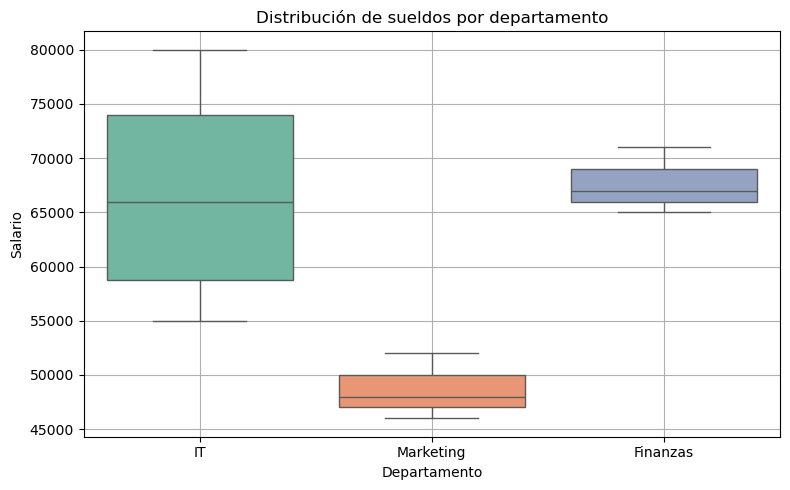

In [25]:
"""
SOLUCION
"""
# Cargamos nuestra informacion
path = "C:\\Users\\PC\\OneDrive\\Documentos\\CursoAnaliticaDatos\\MACHINE-LEARNING\\NIVEL2\\datos\\empleados.csv"

# Parceamos la fecha
df = pd.read_csv(path)

# Estadísticas descriptivas por departamento
print("\nEstadísticas por departamento:")
print(df.groupby("departamento")[["salario", "años_experiencia", "edad"]].describe())

# Correlación entre edad y salario
correlacion = df["edad"].corr(df["salario"])
print(f"\nCorrelación entre edad y salario: {correlacion:.2f}")

# ¿Quién gana más por año de experiencia?
df["salario_por_año"] = df["salario"] / df["años_experiencia"]
mejor_ratio = df.loc[df["salario_por_año"].idxmax()]
print("\nEmpleado que gana más por año de experiencia:")
print(mejor_ratio[["nombre", "departamento", "salario_por_año"]])

# Gráfica de distribución de sueldos por departamento
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="departamento", y="salario", hue="departamento", palette="Set2", legend=False)
plt.title("Distribución de sueldos por departamento")
plt.xlabel("Departamento")
plt.ylabel("Salario")
plt.grid(True)
plt.tight_layout()
plt.show()


Estadísticas por departamento:
             salario                                                         \
               count          mean           std      min      25%      50%   
departamento                                                                  
Finanzas         3.0  67666.666667   3055.050463  65000.0  66000.0  67000.0   
IT               4.0  66750.000000  11354.147554  55000.0  58750.0  66000.0   
Marketing        3.0  48666.666667   3055.050463  46000.0  47000.0  48000.0   

                               años_experiencia        ...            edad  \
                  75%      max            count  mean  ...  75%  max count   
departamento                                           ...                   
Finanzas      69000.0  71000.0              3.0  5.00  ...  5.5  6.0   3.0   
IT            74000.0  80000.0              4.0  4.75  ...  5.5  7.0   4.0   
Marketing     50000.0  52000.0              3.0  2.00  ...  2.5  3.0   3.0   

                        